In [ ]:
# 3 Data Analyses
## 3.1 Investigative statistics
### Set up environment

In [1]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import shapiro 

import copy
import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load 30-year records from each target station.
COH726 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/COH726_30yr.csv')
LYN614 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/LYN614_30yr.csv')
WEY738 = pd.read_csv(r'C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Data_Products/WEY738_30yr.csv')

# Test: The records are 30 years long.
n = 360 # Length of record in months.
assert (len(COH726) == n) & (len(LYN614) == n) & (len(WEY738) == n), "One or more records do not contain exactly 30 years of data." 

# Test: Record lengths are equal across datasets.
assert (len(COH726) == len(LYN614)) & (len(WEY738) == len(LYN614)), "One or more records are unequal lengths."


In [3]:
# Index all records by date.

dates = pd.date_range("1-1-1990", periods=len(COH726), freq="M")
dates = pd.to_datetime(dates)

COH726["Date"] = dates
COH726 = COH726.set_index("Date")
COH726 = COH726[['Precipitation']]

LYN614["Date"] = dates
LYN614 = LYN614.set_index("Date")
LYN614 = LYN614[['Precipitation']]

WEY738["Date"] = dates
WEY738 = WEY738.set_index("Date")
WEY738 = WEY738[['Precipitation']]


### Calculate Descriptive statistics

Skew is calculated by pandas as the adjusted Fisher-Pearson standardized moment coefficient G1 (https://github.com/pandas-dev/pandas/blob/a00154dcfe5057cb3fd86653172e74b6893e337d/pandas/core/nanops.py#L540, https://en.wikipedia.org/wiki/Skewness#Sample_skewness). 



In [6]:
def desc_stats_df(station_info):
    """
    This fucntion calculates descriptive statistics for a set of dataframes
    and returns these statistics in a new dataframe.
    
    Arguements:
    station_info - a list of lists. The first list should be the dataframes
    to calculate statistics on and the second list should be the names of
    the stations as strings.
    
    Returns:
    A dataframe of statistics, unindexed (with statistic types in the first 
    column) and one column per station in station_info.
    
    """
    # Unpack input.
    target_stations = station_info[0]
    station_names = station_info[1]
    
    # Create dataframe to hold statistics.
    statistics = ['Count', 'Mean', 'Median', 'Mode', 'Standard Deviation', 
                  'Minimum', '25% Quartile', '50% Quartile', '75% Quartile', 
                  'Maximum', 'Kurtosis', 'Skew', 'Normality: statistic', 'Normality: p-value']
    all_stats_df = pd.DataFrame(data=statistics, columns=['Statistic'])
    
    # This counter allows indexing into the station_names list to name the new columns. 
    counter = 0
    
    # Calcualte statistics for every station and add to a dataframe.
    for station in target_stations:
        
        # Calculate count mean, standard deviation, and quartiles.
        desc_stats = station.describe()
        
        # Calculate median and mode. 
        med = station.median()
        mod = station.mode()
        
        # Calculate kurtosis, skew, and Shapiro-Wilkes statistic to evaluate normality.
        k = station.kurtosis()
        s = station.skew()
        test_value, p_value = shapiro(station.dropna())
        
        # Select only the values and add everything to a list. Round all numbers to 3 decimal places.
        data = list(desc_stats.iloc[:,0])
        data.extend([med[0], mod.iloc[0][0], k[0], s[0], test_value, p_value])
        data = [round(num, 3) for num in data]
        
        # Add data as nwe column.
        all_stats_df[station_names[counter]] = data
        
        # Increase counter to use the name of the next station in the next loop.
        counter = counter + 1
        
    return(all_stats_df) 
    

In [7]:
station_info = [[COH726, LYN614, WEY738], ['COH726', 'LYN614', 'WEY738']]
station_desc_stats = desc_stats_df(station_info)
station_desc_stats.to_csv(save_loc)


,Statistic,COH726,LYN614,WEY738
0,Count,327.000,342.000,298.000
1,Mean,4.155,3.835,4.077
2,Median,2.075,2.362,2.011
3,Mode,0.110,0.170,0.630
4,Standard Deviation,2.735,2.062,2.507
5,Minimum,3.900,3.350,3.805
6,25% Quartile,5.200,4.800,5.270
7,50% Quartile,13.850,15.500,11.270
8,75% Quartile,3.900,3.350,3.805
9,Maximum,2.990,3.160,2.180


In [45]:
all_station_data = pd.concat([COH726, LYN614, WEY738], join='inner', axis = 1)
all_station_data.columns = ['COH726', 'LYN614', 'WEY738']


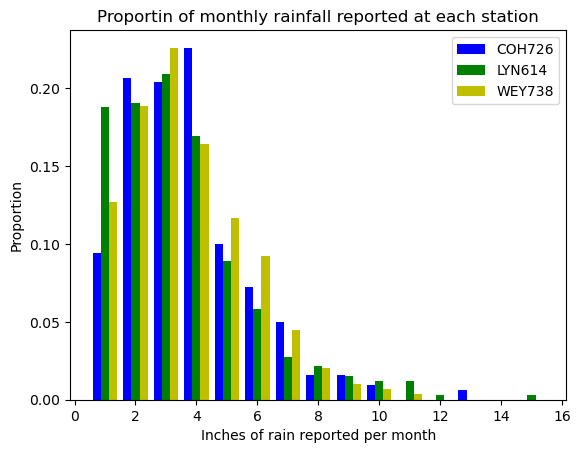

In [82]:
plt.hist(x=all_station_data, bins = range(1,17), density = True, align='left', color = ['b', 'g', 'y'])
plt.xlabel('Inches of rain reported per month')
plt.ylabel('Proportion')
plt.title('Proportin of monthly rainfall reported at each station')
plt.legend(['COH726', 'LYN614', 'WEY738'])
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Image_Products/Proportion-rainfall-stations-of-interest.png')
